In [2]:
import pymc3 as pm

In [1]:
from scipy.stats import beta
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

In [8]:
a, b = 2, 5
x = np.linspace(0, 1, 100)
mode = (a - 1) / (a + b - 2)

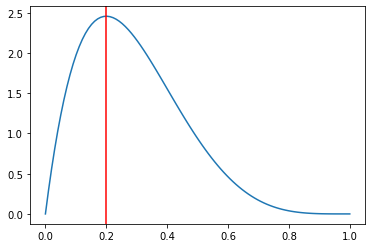

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b), label='beta pdf')
ax.axvline(x=mode, c='r')


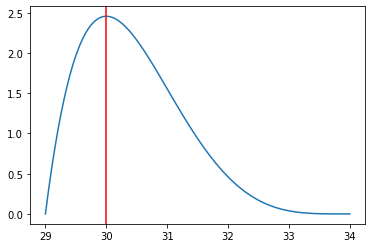

In [16]:
range = 5
elapsed = 30
minimum = elapsed - range * mode

fig, ax = plt.subplots(1, 1)
ax.plot(minimum + range * x , beta.pdf(x, a, b), label='beta pdf')
ax.axvline(x= minimum + range * mode, c='r')

In [17]:
tasks = [
    {
        'range': 5,
        'expected': 20
    },
    {
        'range': 8,
        'expected': 20
    },
    {
        'range': 10,
        'expected': 15
    },
    {
        'range': 4,
        'expected': 5
    }
]

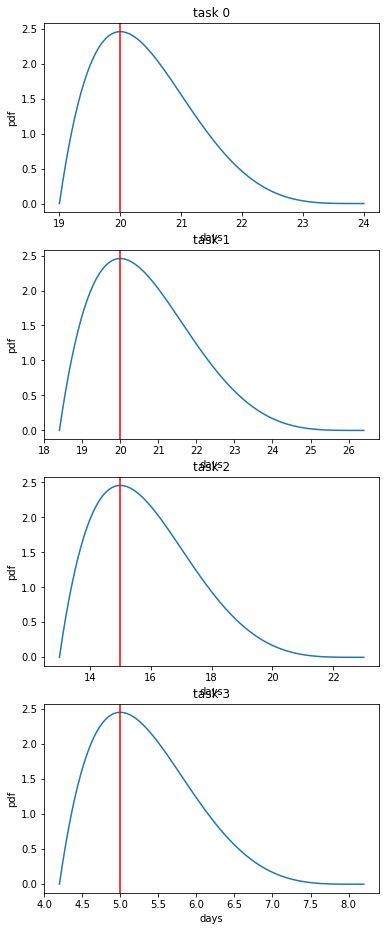

In [22]:
fig, axes = plt.subplots(4, 1, figsize=(6, 16))
for i, task in enumerate(tasks):
    minimum = task['expected'] - task['range'] * mode
    ax = axes[i]
    ax.set_title(f'task {i}')
    ax.plot(minimum + task['range'] * x , beta.pdf(x, a, b))
    ax.axvline(x= minimum + task['range'] * mode, c='r')
    ax.set_xlabel('days')
    ax.set_ylabel('pdf')

In [22]:

with pm.Model():
    taskbeta = pm.Beta('task1', 2, 5)
    task1days = pm.Deterministic("task 1 days", 5 * taskbeta + 20)
    task2days = pm.Deterministic("task 2 days", 8 * taskbeta + 20)
    task3days = pm.Deterministic("task 3 days", 10 * taskbeta + 15)
    task4days = pm.Deterministic("task 4 days", 4 * taskbeta + 5)
    total_elapsed = pm.Deterministic("total elapsed in days", task1days + task2days + task3days + task4days)
    trace = pm.sample(5000)

C:\Users\MarcoSantoni\Anaconda3\envs\pymc_env\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [task1]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 38 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\MarcoSantoni\Anaconda3\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'task1'}>,
        <AxesSubplot:title={'center':'task1'}>],
       [<AxesSubplot:title={'center':'task 1 days'}>,
        <AxesSubplot:title={'center':'task 1 days'}>],
       [<AxesSubplot:title={'center':'task 2 days'}>,
        <AxesSubplot:title={'center':'task 2 days'}>],
       [<AxesSubplot:title={'center':'task 3 days'}>,
        <AxesSubplot:title={'center':'task 3 days'}>],
       [<AxesSubplot:title={'center':'task 4 days'}>,
        <AxesSubplot:title={'center':'task 4 days'}>],
       [<AxesSubplot:title={'center':'total elapsed in days'}>,
        <AxesSubplot:title={'center':'total elapsed in days'}>]],
      dtype=object)

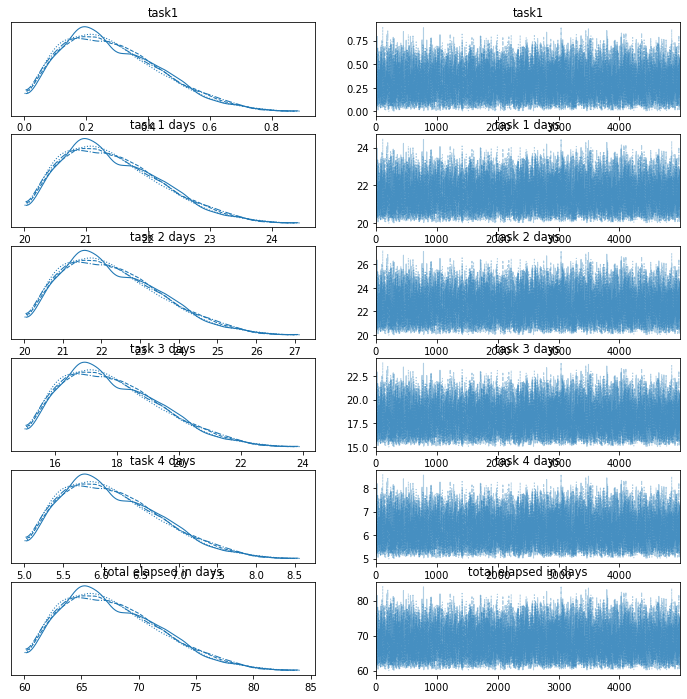

In [24]:
az.plot_trace(trace)

In [4]:
task1.random()

array([[0.36760066, 0.33831392, 0.28860529],
       [0.23835108, 0.47341871, 0.28652039],
       [0.28833784, 0.66636864, 0.78845476]])

In [13]:
x = np.linspace(0.0, 1, 100)

AttributeError: 'DeterministicWrapper' object has no attribute 'distribution'

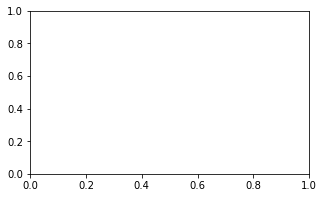

In [16]:
_, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(
    x,
    np.exp(task1scaled.distribution.logp(x).eval()),
)